In [2]:
## IMPORT DEPENDENCIES ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import time
import warnings

pd.set_option('display.max_columns', None)
plt.style.use(style = 'seaborn')

warnings.filterwarnings('ignore')

In [3]:
%%time

## DATA IMPORT ## 
## For this project the data from https://www.kaggle.com/c/ieee-fraud-detection/data has been used. ##

data_path = "./data/"

train = pd.read_csv(data_path + "train_processed.csv")
test = pd.read_csv(data_path + "test_processed.csv")

print('train_set shape is: {}'.format(train.shape))
print('test_set shape is: {}'.format(test.shape))

train_set shape is: (590540, 435)
test_set shape is: (506691, 434)
Wall time: 48.5 s


In [4]:
train.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,ProductCD_encoded,card4_encoded,card6_encoded,P_emaildomain_encoded,R_emaildomain_encoded,M1_encoded,M2_encoded,M3_encoded,M4_encoded,M5_encoded,M6_encoded,M7_encoded,M8_encoded,M9_encoded,id_12_encoded,id_15_encoded,id_16_encoded,id_23_encoded,id_27_encoded,id_28_encoded,id_29_encoded,id_30_encoded,id_31_encoded,id_33_encoded,id_34_encoded,id_35_encoded,id_36_encoded,id_37_encoded,id_38_encoded,DeviceType_encoded,DeviceInfo_encoded
0,0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
test.head()

,Unnamed: 0,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,ProductCD_encoded,card4_encoded,card6_encoded,P_emaildomain_encoded,R_emaildomain_encoded,M1_encoded,M2_encoded,M3_encoded,M4_encoded,M5_encoded,M6_encoded,M7_encoded,M8_encoded,M9_encoded,id_12_encoded,id_15_encoded,id_16_encoded,id_23_encoded,id_27_encoded,id_28_encoded,id_29_encoded,id_30_encoded,id_31_encoded,id_33_encoded,id_34_encoded,id_35_encoded,id_36_encoded,id_37_encoded,id_38_encoded,DeviceType_encoded,DeviceInfo_encoded
0,0,3663549,18403224,31.95,10409,111.0,150.0,226.0,170.0,87.0,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

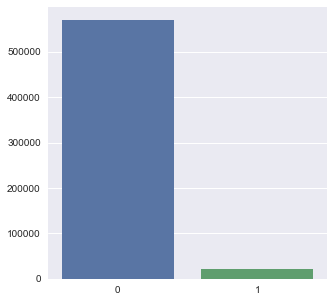

In [6]:
fig = plt.figure(figsize = (5, 5))

sns.barplot(x = [0,1], y = train['isFraud'].value_counts().values)
plt.show()

In [7]:
fraud_ratio = train['isFraud'].sum()/len(train['isFraud'])
print(fraud_ratio) # percentage of frauds in the train set
del fraud_ratio 

0.03499000914417313


In [8]:
stats_df = pd.DataFrame(columns = ['train_time', 'train_precision', 'train_accuracy', 'train_recall', 'train_roc_auc',
                                   'test_precision', 'test_accuracy', 'test_recall', 'test_roc_auc'])

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred):
    print('-----------------------------------------------------')
    print(experiment_name + ' train precision score is {}'.format(precision_score(y_train, y_train_pred)))
    print(experiment_name + ' train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
    print(experiment_name + ' train recall score is {}'.format(recall_score(y_train, y_train_pred)))
    print(experiment_name + ' train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
    print('-----------------------------------------------------')
    print(experiment_name + ' test precision score is {}'.format(precision_score(y_test, y_pred)))
    print(experiment_name + ' test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
    print(experiment_name + ' test recall score is {}'.format(recall_score(y_test, y_pred)))
    print(experiment_name + ' test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
    print('-----------------------------------------------------')
    print(' Train confusion matrix')
    print(confusion_matrix(y_train, y_train_pred))
    print('-----------------------------------------------------')
    print(' Test confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('-----------------------------------------------------')

In [10]:
%%time
# UNBALANCED APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

experiment_name = 'UNBALANCED APPROACH - DECISION TREE'

X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=False)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

from sklearn.tree import DecisionTreeClassifier

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV

#clf_model = DecisionTreeClassifier(criterion="gini")
#distrib = dict(max_depth = [10,100,500], min_samples_leaf=[5,10,20,50])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_min_samples_leaf = search.best_params_['min_samples_leaf']
#best_max_depth = search.best_params_['max_depth']
# results ====> optimal values are: 'min_samples_leaf': 20, 'max_depth': 10
## ------------------------------------------- ##

best_min_samples_leaf = 20
best_max_depth = 10

clf_model = DecisionTreeClassifier(criterion="gini", 
                                   max_depth = best_max_depth, 
                                   min_samples_leaf = best_min_samples_leaf)

clf_model.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)



stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

-----------------------------------------------------
UNBALANCED APPROACH - DECISION TREE train precision score is 0.8881843489019486
UNBALANCED APPROACH - DECISION TREE train accuracy score is 0.975490652623023
UNBALANCED APPROACH - DECISION TREE train recall score is 0.3459846978733659
UNBALANCED APPROACH - DECISION TREE train auc score is 0.6721992953403
-----------------------------------------------------
UNBALANCED APPROACH - DECISION TREE test precision score is 0.6633846153846154
UNBALANCED APPROACH - DECISION TREE test accuracy score is 0.9700867003081926
UNBALANCED APPROACH - DECISION TREE test recall score is 0.265255905511811
UNBALANCED APPROACH - DECISION TREE test auc score is 0.630229755568855
-----------------------------------------------------
 Train confusion matrix
[[455110    723]
 [ 10856   5743]]
-----------------------------------------------------
 Test confusion matrix
[[113497    547]
 [  2986   1078]]
-----------------------------------------------------
Wal

In [11]:
%%time
# UNBALANCED APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

experiment_name = 'UNBALANCED APPROACH - XGBOOST'

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV

#clf_model = xgb.XGBClassifier(criterion="gini")
#distrib = dict(max_depth = [5,10], n_estimators = [50, 100], learning_rate=[0.02, 0.1, 0.2])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_n_estimators = search.best_params_['n_estimators']
#best_max_depth = search.best_params_['max_depth']
#best_learning_rate = search.best_params_['learning_rate']
# results ====> optimal values are: 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.02
## ------------------------------------------- ##

best_max_depth = 10
best_n_estimators = 100
best_learning_rate = 0.02

xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist',
                           max_depth = best_max_depth,
                           n_estimators = best_n_estimators,
                           learning_rate = best_learning_rate)

xgmodel.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)


stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

[14:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------------------------
UNBALANCED APPROACH - XGBOOST train precision score is 0.978035143769968
UNBALANCED APPROACH - XGBOOST train accuracy score is 0.9800669726013479
UNBALANCED APPROACH - XGBOOST train recall score is 0.4426170251219953
UNBALANCED APPROACH - XGBOOST train auc score is 0.7211275252257235
-----------------------------------------------------
UNBALANCED APPROACH - XGBOOST test precision score is 0.809775429326288
UNBALANCED APPROACH - XGBOOST test accuracy score is 0.9735326988857655
UNBALANCED APPROACH - XGBOOST test recall score is 0.3016732283464567
UNBALANCED APPROACH - XGBOOST test auc score is 0.649573943625019
-----------------

In [12]:
%%time
## UNDERSAMPLING APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

experiment_name = 'UNDERSAMPLING APPROACH - DECISION TREE'

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=False)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

# Undersample the train dataset
ros = RandomUnderSampler(random_state=17)

X_train_imp, y_train = ros.fit_resample(X_train_imp, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))


from sklearn.tree import DecisionTreeClassifier

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV
#clf_model = DecisionTreeClassifier(criterion="gini")
#distrib = dict(max_depth = [10,100,500], min_samples_leaf=[5,10,20,50])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_min_samples_leaf = search.best_params_['min_samples_leaf']
#best_max_depth = search.best_params_['max_depth']
# results ====> optimal values are: 'min_samples_leaf': 50, 'max_depth': 10
## ------------------------------------------- ##

best_min_samples_leaf = 50
best_max_depth = 10

clf_model = DecisionTreeClassifier(criterion="gini", 
                                   max_depth = best_max_depth, 
                                   min_samples_leaf = best_min_samples_leaf)

clf_model.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)



stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

Resampled dataset shape Counter({0: 16599, 1: 16599})
-----------------------------------------------------
UNDERSAMPLING APPROACH - DECISION TREE train precision score is 0.8056066740277267
UNDERSAMPLING APPROACH - DECISION TREE train accuracy score is 0.8001385625640098
UNDERSAMPLING APPROACH - DECISION TREE train recall score is 0.7911922404964155
UNDERSAMPLING APPROACH - DECISION TREE train auc score is 0.8001385625640098
-----------------------------------------------------
UNDERSAMPLING APPROACH - DECISION TREE test precision score is 0.11404153292857419
UNDERSAMPLING APPROACH - DECISION TREE test accuracy score is 0.7965844819995258
UNDERSAMPLING APPROACH - DECISION TREE test recall score is 0.7256397637795275
UNDERSAMPLING APPROACH - DECISION TREE test auc score is 0.7623761934887957
-----------------------------------------------------
 Train confusion matrix
[[13430  3169]
 [ 3466 13133]]
-----------------------------------------------------
 Test confusion matrix
[[91134 229

In [13]:
%%time
# UNDERSAMPLING APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

experiment_name = 'UNDERSAMPLING APPROACH - XGBOOST'

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV

#clf_model = xgb.XGBClassifier(criterion="gini")
#distrib = dict(max_depth = [5,10], n_estimators = [50, 100], learning_rate=[0.02, 0.1, 0.2])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_n_estimators = search.best_params_['n_estimators']
#best_max_depth = search.best_params_['max_depth']
#best_learning_rate = search.best_params_['learning_rate']
# results ====> optimal values are: 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.02
## ------------------------------------------- ##

best_max_depth = 5
best_n_estimators = 50
best_learning_rate = 0.02

xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist',
                           max_depth = best_max_depth,
                           n_estimators = best_n_estimators,
                           learning_rate = best_learning_rate)

xgmodel.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)


stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

[14:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------------------------
UNDERSAMPLING APPROACH - XGBOOST train precision score is 0.8272825792468166
UNDERSAMPLING APPROACH - XGBOOST train accuracy score is 0.7911018736068438
UNDERSAMPLING APPROACH - XGBOOST train recall score is 0.7358274594855112
UNDERSAMPLING APPROACH - XGBOOST train auc score is 0.7911018736068438
-----------------------------------------------------
UNDERSAMPLING APPROACH - XGBOOST test precision score is 0.1361007462686567
UNDERSAMPLING APPROACH - XGBOOST test accuracy score is 0.8334744471161988
UNDERSAMPLING APPROACH - XGBOOST test recall score is 0.718011811023622
UNDERSAMPLING APPROACH - XGBOOST test auc score is 0.77780040

In [14]:
%%time
## OVERSAMPLING APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

experiment_name = 'OVERSAMPLING APPROACH - DECISION TREE'

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=False)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

# Undersample the train dataset
ros = RandomOverSampler(random_state=17)

X_train_imp, y_train = ros.fit_resample(X_train_imp, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))


from sklearn.tree import DecisionTreeClassifier

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV
#clf_model = DecisionTreeClassifier(criterion="gini")
#distrib = dict(max_depth = [10,100,500], min_samples_leaf=[5,10,20,50])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_min_samples_leaf = search.best_params_['min_samples_leaf']
#best_max_depth = search.best_params_['max_depth']
# results ====> optimal values are: 'min_samples_leaf': 5, 'max_depth': 100
## ------------------------------------------- ##

best_min_samples_leaf = 5
best_max_depth = 100

clf_model = DecisionTreeClassifier(criterion="gini", 
                                   max_depth = best_max_depth, 
                                   min_samples_leaf = best_min_samples_leaf)

clf_model.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)


stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

Resampled dataset shape Counter({0: 455833, 1: 455833})
-----------------------------------------------------
OVERSAMPLING APPROACH - DECISION TREE train precision score is 0.9907173160850591
OVERSAMPLING APPROACH - DECISION TREE train accuracy score is 0.9953151702487534
OVERSAMPLING APPROACH - DECISION TREE train recall score is 1.0
OVERSAMPLING APPROACH - DECISION TREE train auc score is 0.9953151702487534
-----------------------------------------------------
OVERSAMPLING APPROACH - DECISION TREE test precision score is 0.28350688612697345
OVERSAMPLING APPROACH - DECISION TREE test accuracy score is 0.9437633352524808
OVERSAMPLING APPROACH - DECISION TREE test recall score is 0.4153543307086614
OVERSAMPLING APPROACH - DECISION TREE test auc score is 0.688973857858978
-----------------------------------------------------
 Train confusion matrix
[[451562   4271]
 [     0 455833]]
-----------------------------------------------------
 Test confusion matrix
[[109778   4266]
 [  2376   1

In [15]:
%%time
# OVERSAMPLING APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

experiment_name = 'OVERSAMPLING APPROACH - XGBOOST'

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV

#clf_model = xgb.XGBClassifier(criterion="gini")
#distrib = dict(max_depth = [5,10], n_estimators = [50, 100], learning_rate=[0.02, 0.1, 0.2])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#best_n_estimators = search.best_params_['n_estimators']
#best_max_depth = search.best_params_['max_depth']
#best_learning_rate = search.best_params_['learning_rate']
# results ====> optimal values are: 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.02
## ------------------------------------------- ##

best_max_depth = 5
best_n_estimators = 50
best_learning_rate = 0.02

xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist',
                           max_depth = best_max_depth,
                           n_estimators = best_n_estimators,
                           learning_rate = best_learning_rate)

xgmodel.fit(X_train_imp,y_train)

end_time = datetime.datetime.now() - start_time

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)


stats_df.loc[experiment_name] = ([end_time,
                                  precision_score(y_train, y_train_pred),
                                  accuracy_score(y_train, y_train_pred),
                                  recall_score(y_train, y_train_pred),
                                  roc_auc_score(y_train, y_train_pred),
                                  precision_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred),
                                 ])

print_metric_stats(experiment_name, y_train, y_train_pred, y_test, y_pred)

[14:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------------------------
OVERSAMPLING APPROACH - XGBOOST train precision score is 0.829645459537272
OVERSAMPLING APPROACH - XGBOOST train accuracy score is 0.7923768134382548
OVERSAMPLING APPROACH - XGBOOST train recall score is 0.7358484357209768
OVERSAMPLING APPROACH - XGBOOST train auc score is 0.792376813438255
-----------------------------------------------------
OVERSAMPLING APPROACH - XGBOOST test precision score is 0.13973145285935085
OVERSAMPLING APPROACH - XGBOOST test accuracy score is 0.8392826904189385
OVERSAMPLING APPROACH - XGBOOST test recall score is 0.7118602362204725
OVERSAMPLING APPROACH - XGBOOST test auc score is 0.7778418363944072

In [17]:
display(stats_df)

,train_time,train_precision,train_accuracy,train_recall,train_roc_auc,test_precision,test_accuracy,test_recall,test_roc_auc
UNBALANCED APPROACH - DECISION TREE,0 days 00:00:57.472618,0.888184,0.975491,0.345985,0.672199,0.663385,0.970087,0.265256,0.630230
UNBALANCED APPROACH - XGBOOST,0 days 00:01:33.130283,0.978035,0.980067,0.442617,0.721128,0.809775,0.973533,0.301673,0.649574
UNDERSAMPLING APPROACH - DECISION TREE,0 days 00:00:34.497192,0.805607,0.800139,0.791192,0.800139,0.114042,0.796584,0.725640,0.762376
UNDERSAMPLING APPROACH - XGBOOST,0 days 00:00:03.295051,0.827283,0.791102,0.735827,0.791102,0.136101,0.833474,0.718012,0.777800
OVERSAMPLING APPROACH - DECISION TREE,0 days 00:05:53.057726,0.990717,0.995315,1.000000,0.995315,0.283507,0.943763,0.415354,0.688974
OVERSAMPLING APPROACH - XGBOOST,0 days 00:00:39.821912,0.829645,0.792377,0.735848,0.792377,0.139731,0.839283,0.711860,0.777842
